In [70]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

### EAD

In [71]:
# Read cvs data in the "data" folder
train_df = pd.read_csv("data/Training.csv")
test_df = pd.read_csv("data/Testing.csv")

In [72]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [73]:
train_df.drop('Unnamed: 133', axis=1, inplace=True)
train_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [74]:
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [75]:
print(train_df.dtypes)

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object


In [76]:
train_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [78]:
train_df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [79]:
for col in train_df.columns[:-1]:
    print("{} ({}) : {}".format(col, len(train_df[col].unique()), train_df[col].unique()))

itching (2) : [1 0]
skin_rash (2) : [1 0]
nodal_skin_eruptions (2) : [1 0]
continuous_sneezing (2) : [0 1]
shivering (2) : [0 1]
chills (2) : [0 1]
joint_pain (2) : [0 1]
stomach_pain (2) : [0 1]
acidity (2) : [0 1]
ulcers_on_tongue (2) : [0 1]
muscle_wasting (2) : [0 1]
vomiting (2) : [0 1]
burning_micturition (2) : [0 1]
spotting_ urination (2) : [0 1]
fatigue (2) : [0 1]
weight_gain (2) : [0 1]
anxiety (2) : [0 1]
cold_hands_and_feets (2) : [0 1]
mood_swings (2) : [0 1]
weight_loss (2) : [0 1]
restlessness (2) : [0 1]
lethargy (2) : [0 1]
patches_in_throat (2) : [0 1]
irregular_sugar_level (2) : [0 1]
cough (2) : [0 1]
high_fever (2) : [0 1]
sunken_eyes (2) : [0 1]
breathlessness (2) : [0 1]
sweating (2) : [0 1]
dehydration (2) : [0 1]
indigestion (2) : [0 1]
headache (2) : [0 1]
yellowish_skin (2) : [0 1]
dark_urine (2) : [0 1]
nausea (2) : [0 1]
loss_of_appetite (2) : [0 1]
pain_behind_the_eyes (2) : [0 1]
back_pain (2) : [0 1]
constipation (2) : [0 1]
abdominal_pain (2) : [0 1]
d

In [80]:
#Get the correlation of the columns
# train_df.corr()

In [81]:
len(test_df['prognosis'].unique())

41

### Data Preparation

In [82]:
X_train = train_df.drop('prognosis', axis=1).values
y_train = train_df['prognosis'].values
# y_train = np.array(y_train).reshape(y_train.shape[0], 1)

X_test = test_df.drop('prognosis', axis=1).values
y_test = test_df['prognosis'].values
# y_test = np.array(y_test).reshape(y_test.shape[0], 1)

print("X_train : {} \ny_train : {} \nX_test: {} \ny_test : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train : (4920, 132) 
y_train : (4920,) 
X_test: (42, 132) 
y_test : (42,)


In [83]:
# convert categorial to enumerate output
y_train_enc = pd.get_dummies(train_df['prognosis'])
y_test_enc = pd.get_dummies(test_df['prognosis'])

In [84]:
# Record performace: training time and test time, evaluation metrics
classifiers = ['tree', 'nn', 'boost', 'svm', 'knn']
attr = ['train_time', 'test_time', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
performance = pd.DataFrame(columns=attr, index=classifiers)

### Decision tree

In [85]:
dt_model = tree.DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

pred = dt_model.predict(X_test)
acc = dt_model.score(X_test, y_test)

print("Acurray on test set: {:.2f}%".format(acc*100))

Acurray on test set: 97.62%


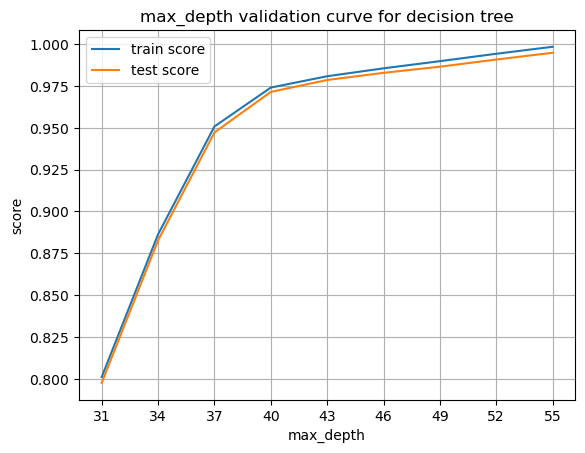

In [86]:
# max_depth validation curve
depth_range = np.arange(30, 55, 3) + 1
train_scores, test_scores = validation_curve(dt_model, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='test score')
plt.title('max_depth validation curve for decision tree')
plt.xlabel('max_depth')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/dt_max_depth_curve_dp.png')
plt.show()

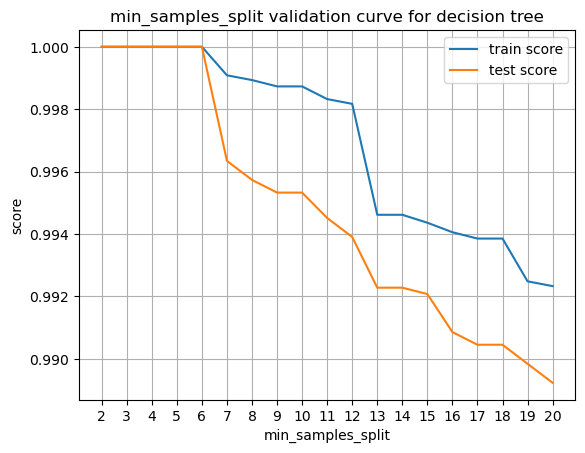

In [87]:
# min_samples_split validation curve
samples_split_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(dt_model, X_train, y_train, param_name="min_samples_split", 
                                             param_range=samples_split_range, cv=5)

plt.figure()
plt.xticks(samples_split_range)
plt.plot(samples_split_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(samples_split_range, np.mean(test_scores, axis=1), label='test score')
plt.title('min_samples_split validation curve for decision tree')
plt.xlabel('min_samples_split')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/dt_min_samples_split_curve_dp.png')
plt.show()

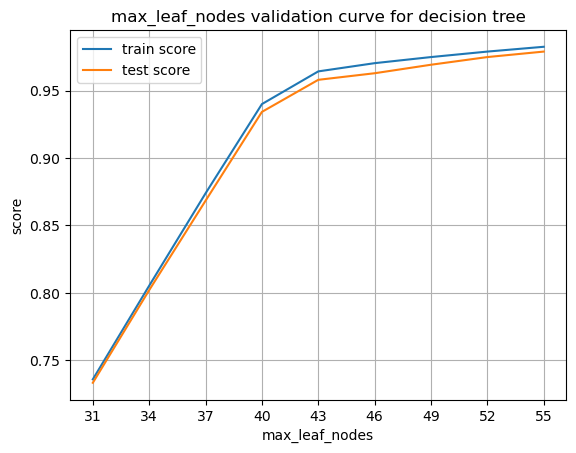

In [88]:
# max_leaf_nodes validation curve
leaf_nodes_range = np.arange(30, 55, 3) + 1
train_scores, test_scores = validation_curve(dt_model, X_train, y_train, param_name="max_leaf_nodes", 
                                             param_range=leaf_nodes_range, cv=5)

plt.figure()
plt.xticks(leaf_nodes_range)
plt.plot(leaf_nodes_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(leaf_nodes_range, np.mean(test_scores, axis=1), label='test score')
plt.title('max_leaf_nodes validation curve for decision tree')
plt.xlabel('max_leaf_nodes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/dt_max_leaf_nodes_curve_dp.png')
plt.show()

In [89]:
# Hyperparameter tuning using grid search
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(35,55).tolist()[0::1],
              'min_samples_split':np.arange(4,8).tolist()[0::1],
              'max_leaf_nodes':np.arange(35,50).tolist()[0::1]}
dt_model_gs = GridSearchCV(dt_model, param_grid=parameters, cv=5, n_jobs=-1)

t0 = time.time()
dt_model_gs.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

best_dt_params = dt_model_gs.best_params_
best_dt_model = dt_model_gs.best_estimator_

t0 = time.time()
y_pred = best_dt_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['tree'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                            recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
print("Best parameters set for decision tree:")
print(best_dt_params)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('decision tree accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Best parameters set for decision tree:
{'criterion': 'gini', 'max_depth': 41, 'max_leaf_nodes': 49, 'min_samples_split': 4}
training time: 138.505967 seconds
testing time : 0.000000 seconds
decision tree accuracy: 97.62%


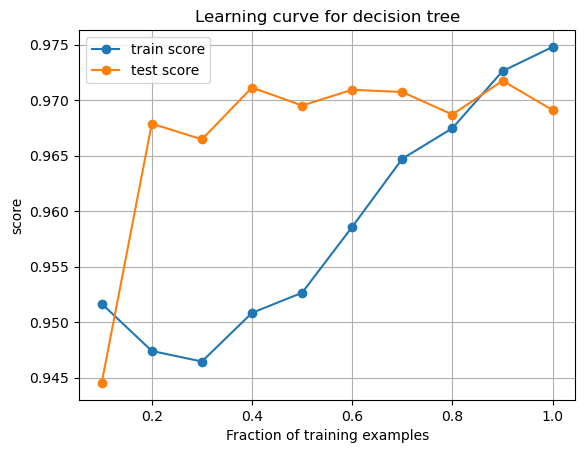

In [90]:
# learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
_, train_scores, test_scores = learning_curve(best_dt_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='test score')
plt.title('Learning curve for decision tree')
plt.xlabel('Fraction of training examples')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/dt_learning_curve_dp.png')
plt.show()

### Neural network

In [91]:
# Neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(32, 41), random_state=1, max_iter=3000)
# nn_model.fit(X_train, y_train)
# y_pred = nn_model.predict(X_test)

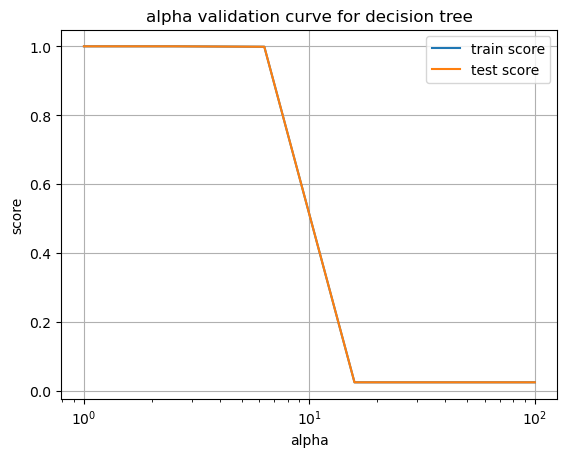

In [92]:
# alpha validation curve
alpha_range = np.logspace(0, 2, 6)
train_scores, test_scores = validation_curve(nn_model, X_train, y_train, param_name="alpha", 
                                             param_range=alpha_range, cv=5)

plt.figure()
plt.xticks(alpha_range)
plt.semilogx(alpha_range, np.mean(train_scores, axis=1), label='train score')
plt.semilogx(alpha_range, np.mean(test_scores, axis=1), label='test score')
plt.title('alpha validation curve for decision tree')
plt.xlabel('alpha')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/nn_alpha_curve_dp.png')
plt.show()

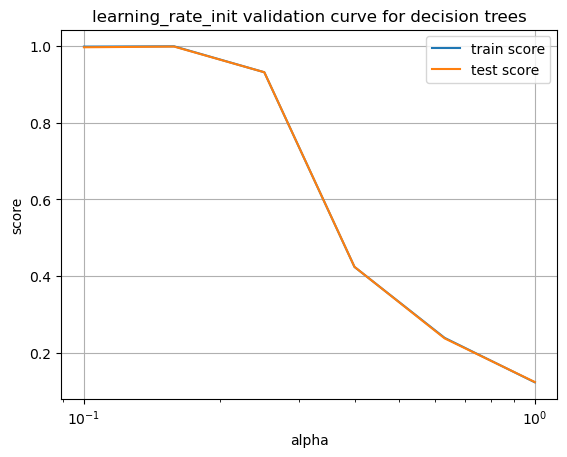

In [93]:
# learning_rate_init validation curve
learning_rate_range = np.logspace(-1, 0, 6)
# learning_rate_range = np.linspace(0.001, 0.1, 5)
train_scores, test_scores = validation_curve(nn_model, X_train, y_train, param_name="learning_rate_init", 
                                             param_range=learning_rate_range, cv=5)

plt.figure()
plt.xticks(learning_rate_range)
plt.semilogx(learning_rate_range, np.mean(train_scores, axis=1), label='train score')
plt.semilogx(learning_rate_range, np.mean(test_scores, axis=1), label='test score')
plt.title('learning_rate_init validation curve for decision trees')
plt.xlabel('alpha')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/nn_learning_rate_init_curve_dp.png')
plt.show()

In [94]:
# Hyperparameter tuning using grid search
parameters = {'alpha':np.linspace(0.001, 1., 10),
              'learning_rate_init':np.linspace(0.01, .5, 10)}
nn_model_gs = GridSearchCV(nn_model, param_grid=parameters, cv=5, n_jobs=-1)
t0 = time.time()
nn_model_gs.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

best_nn_params = nn_model_gs.best_params_
best_nn_model = nn_model_gs.best_estimator_

t0 = time.time()
y_pred = best_nn_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['nn'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                            recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
print("Best parameters set for neural networks:")
print(best_nn_params)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('neural network accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Best parameters set for neural networks:
{'alpha': 0.001, 'learning_rate_init': 0.01}
training time: 73.650542 seconds
testing time : 0.000000 seconds
neural network accuracy: 100.00%


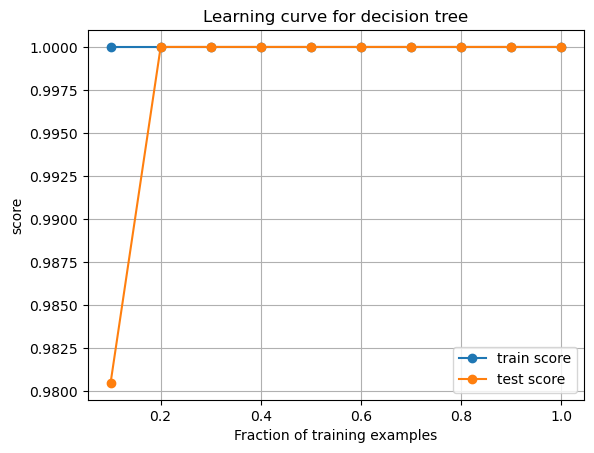

In [95]:
# learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
_, train_scores, test_scores = learning_curve(best_nn_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='test score')
plt.title('Learning curve for decision tree')
plt.xlabel('Fraction of training examples')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/nn_learning_curve_dp.png')
plt.show()

### Boosting

In [96]:
num_learners = 100
dt_stump = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
boost_model = AdaBoostClassifier(estimator=dt_stump, n_estimators=num_learners, random_state=0)
# boost_model.fit(X_train, y_train)
# y_pred = boost_model.predict(X_test)

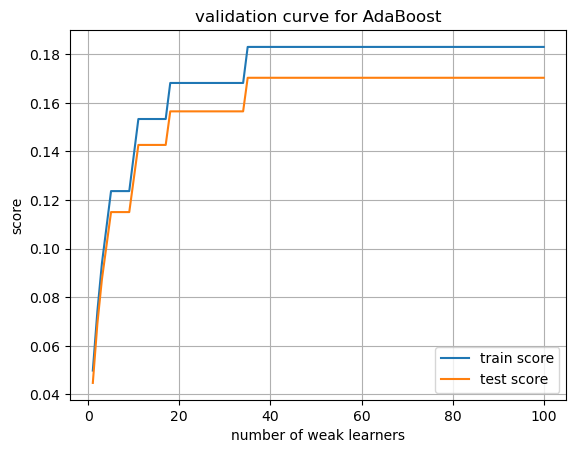

In [97]:
# num_learners curve
# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)
train_scores = np.zeros((num_learners, num_folds))
val_scores = np.zeros((num_learners, num_folds))
for idx, (train_index, test_index) in enumerate(kf.split(X_train)):
    boost_model.fit(X_train[train_index], y_train[train_index])
    train_scores[:, idx] = np.asarray(list(boost_model.staged_score(X_train[train_index], y_train[train_index])))
    val_scores[:, idx] = np.asarray(list(boost_model.staged_score(X_train[test_index], y_train[test_index])))

n_estimators_range = np.arange(num_learners) + 1
plt.figure()
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(n_estimators_range, np.mean(val_scores, axis=1), label='test score')
plt.title('validation curve for AdaBoost')
plt.xlabel('number of weak learners')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/boost_num_weak_learner_curve_dp.png')
plt.show()

In [98]:
precision_score(y_test, y_pred, average='weighted')

1.0

In [99]:
# Model valuation
optimal_num_learners = np.argmax(np.mean(val_scores, axis=1))
best_boost_model = AdaBoostClassifier(estimator=dt_stump, n_estimators=optimal_num_learners, random_state=0)

t0 = time.time()
best_boost_model.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

t0 = time.time()
y_pred = best_boost_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['boost'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                            recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
print("Optimal number of weak learners for AdaBoost:")
print(optimal_num_learners)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('AdaBoost accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Optimal number of weak learners for AdaBoost:
34
training time: 0.665181 seconds
testing time : 0.006030 seconds
AdaBoost accuracy: 11.90%


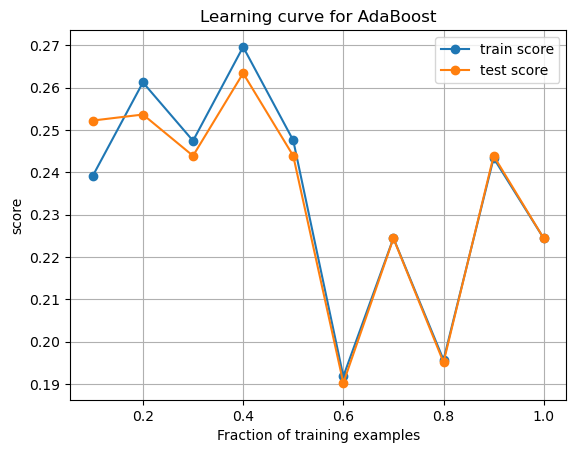

In [100]:
# learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
_, train_scores, test_scores = learning_curve(best_boost_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='test score')
plt.title('Learning curve for AdaBoost')
plt.xlabel('Fraction of training examples')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/boost_learning_curve_dp.png')
plt.show()

### SVM

In [101]:
svm_model = svm.SVC()

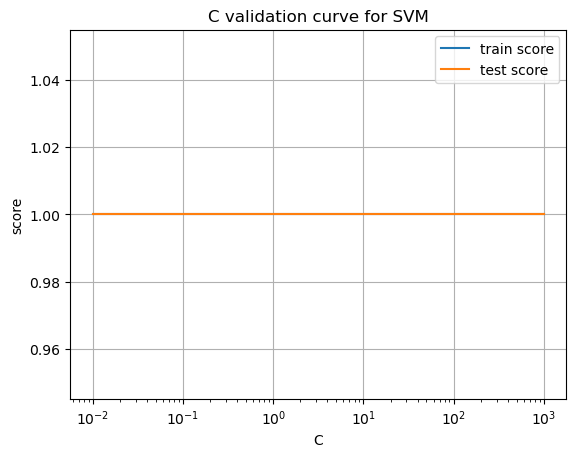

In [102]:
C_range = np.logspace(-2, 3, 6)
train_scores, test_scores = validation_curve(svm_model, X_train, y_train, param_name="C", param_range=C_range, cv=5)

plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1), label='train score')
plt.semilogx(C_range, np.mean(test_scores, axis=1), label='test score')
plt.title('C validation curve for SVM')
plt.xlabel('C')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/svm_c_curve_dp.png')
plt.show()

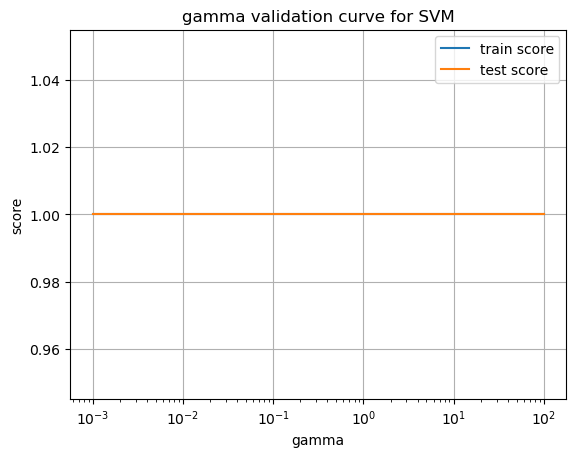

In [103]:
gamma_range = np.logspace(-3, 2, 6)
train_scores, test_scores = validation_curve(svm_model, X_train, y_train, param_name="gamma", param_range=gamma_range, cv=5)

plt.figure()
plt.semilogx(gamma_range, np.mean(train_scores, axis=1), label='train score')
plt.semilogx(gamma_range, np.mean(test_scores, axis=1), label='test score')
plt.title('gamma validation curve for SVM')
plt.xlabel('gamma')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/svm_gamma_curve_dp.png')
plt.show()

In [104]:
# Hyperparameter tuning using grid search
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
svm_model_gs = GridSearchCV(svm_model, param_grid=parameters, cv=5, n_jobs=-1)
t0 = time.time()
svm_model_gs.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

best_svm_params = svm_model_gs.best_params_
best_svm_model = svm_model_gs.best_estimator_

t0 = time.time()
y_pred = best_svm_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['svm'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                            recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
print("Best parameters set for SVM:")
print(best_svm_params)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('SVM accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Best parameters set for SVM:
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
training time: 28.881266 seconds
testing time : 0.013999 seconds
SVM accuracy: 97.62%


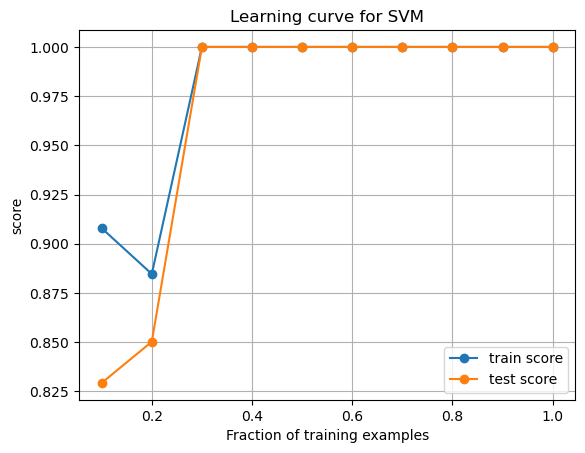

In [105]:
# learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
_, train_scores, test_scores = learning_curve(best_svm_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='test score')
plt.title('Learning curve for SVM')
plt.xlabel('Fraction of training examples')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/svm_learning_curve_dp.png')
plt.show()

### kNN

In [106]:
knn_model = KNeighborsClassifier()

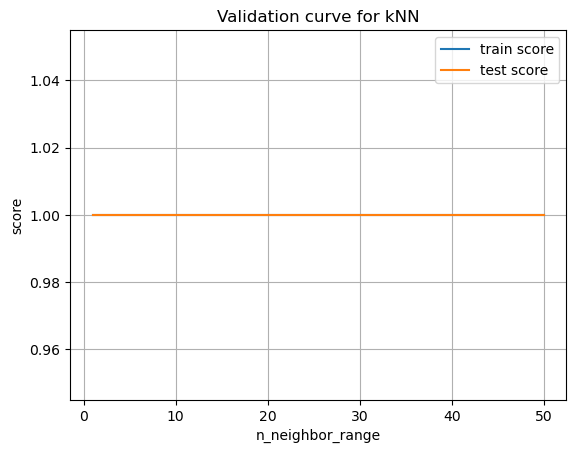

In [107]:
n_neighbor_range = np.arange(1, 51)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", 
                                             param_range=n_neighbor_range, cv=5)

plt.figure()
plt.plot(n_neighbor_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(n_neighbor_range, np.mean(test_scores, axis=1), label='test score')
plt.title('Validation curve for kNN')
plt.xlabel('n_neighbor_range')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/knn_n_neighbor_range_curve_dp.png')
plt.show()

In [108]:
# Model valuation
optimal_n_neighbor = np.argmax(np.mean(val_scores, axis=1))
best_knn_model = KNeighborsClassifier(n_neighbors=optimal_n_neighbor)

t0 = time.time()
best_knn_model.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

t0 = time.time()
y_pred = best_knn_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['knn'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                            recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
print("Optimal number of neighbors for knn:")
print(optimal_n_neighbor)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('kNN accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Optimal number of neighbors for knn:
34
training time: 0.007998 seconds
testing time : 0.010002 seconds
kNN accuracy: 100.00%


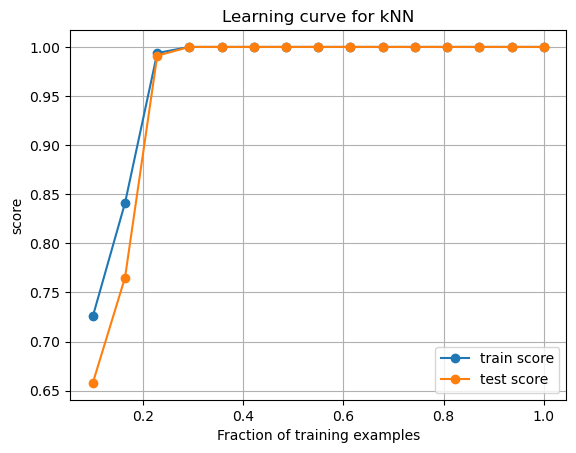

In [109]:
# learning curve
import warnings
warnings.filterwarnings('ignore')
train_sizes = np.linspace(0.1, 1.0, 15)
_, train_scores, test_scores = learning_curve(best_knn_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='test score')
plt.title('Learning curve for kNN')
plt.xlabel('Fraction of training examples')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/knn_learning_curve_dp.png')
plt.show()

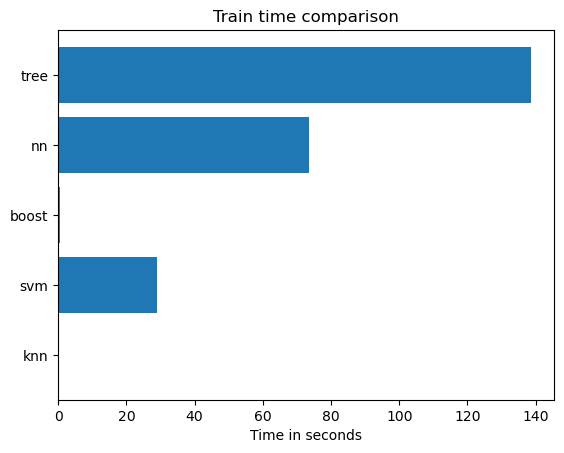

In [110]:
# Classifier comparison: Train time
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, performance['train_time'])
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(classifiers)
plt.gca().invert_yaxis()
plt.title('Train time comparison')
plt.xlabel('Time in seconds')
plt.savefig('figures/train_time_comparison_dp.png')
plt.show()

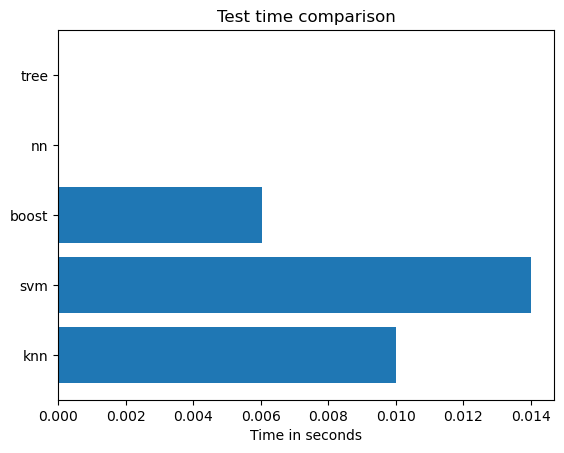

In [111]:
# Classifier comparison: Test time
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, performance['test_time'])
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(classifiers)
plt.gca().invert_yaxis()
plt.title('Test time comparison')
plt.xlabel('Time in seconds')
plt.savefig('figures/test_time_comparison_dp.png')
plt.show()

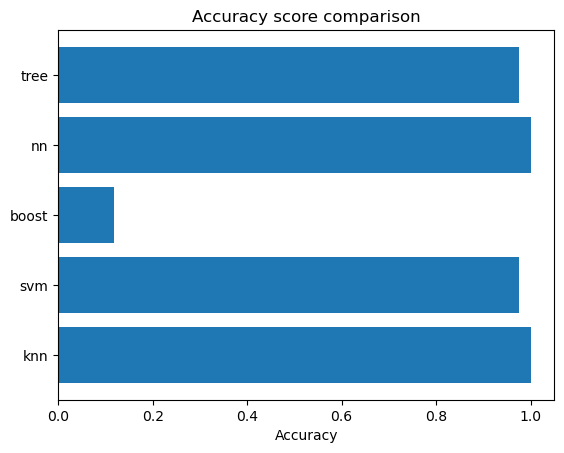

In [112]:
# Classifier comparison
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, performance['accuracy_score'])
plt.gca().set_yticks(y_pos)
# plt.gca().set_xlim(0.6, 1.0)
plt.gca().set_yticklabels(classifiers)
plt.gca().invert_yaxis()
plt.title('Accuracy score comparison')
plt.xlabel('Accuracy')
plt.savefig('figures/accuracy_score_comparison_dp.png')
plt.show()

In [113]:
performance

,train_time,test_time,accuracy_score,precision_score,recall_score,f1_score
tree,138.505967,0.0,0.97619,0.988095,0.97619,0.97619
nn,73.650542,0.0,1.0,1.0,1.0,1.0
boost,0.665181,0.00603,0.119048,0.083977,0.119048,0.088555
svm,28.881266,0.013999,0.97619,0.988095,0.97619,0.97619
knn,0.007998,0.010002,1.0,1.0,1.0,1.0
